In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import stats

from disp import set_font_size

cc = np.concatenate

# spectrogram (V377)

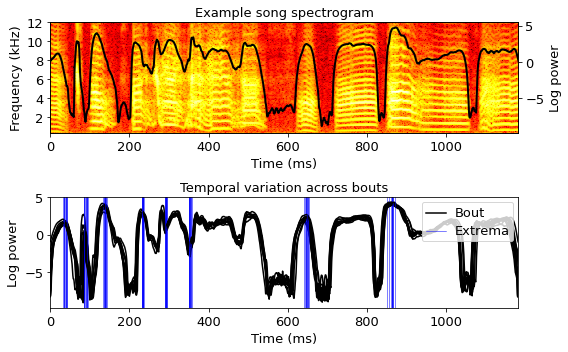

In [2]:
feat_rends = loadmat('from_alison/V377_timecorrection.mat')['savefeatslice'].T
extrema_all = loadmat('from_alison/V377_timecorrection.mat')['extrema_locations'].T
n_rends = 10

fig, axs = plt.subplots(2, 1, figsize=(8, 5), tight_layout=True)

for cr, (rend, extrema) in enumerate(zip(feat_rends[:n_rends], extrema_all[:n_rends])):
    axs[1].plot(rend, c='k')
    for extremum in extrema:
        axs[1].axvline(extremum, c='b', lw=.5)

axs[1].set_xlim(0, feat_rends.shape[1])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Log power')
axs[1].set_title('Temporal variation across bouts')
axs[1].legend(['Bout', 'Extrema'], loc='upper right')

t_start = 665
spec = loadmat('from_alison/V377_spectrogram_day135bout108.mat')['sonogram_im']
log_pwr = loadmat('from_alison/V377_spectrogram_day135bout108.mat')['logpower'].flatten()

axs[0].matshow(np.log(spec), origin='lower', cmap='hot', extent=[-t_start, len(log_pwr)-t_start, .3, 12])
axs[0].set_aspect('auto')
axs[0].xaxis.tick_bottom()
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Frequency (kHz)')
axs[0].set_title('Example song spectrogram')
ax_twin = axs[0].twinx()
ax_twin.plot(np.arange(len(log_pwr))-t_start, log_pwr, c='k', lw=2)
ax_twin.set_ylabel('Log power')

axs[0].set_xlim(0, feat_rends.shape[1])

set_font_size(cc([axs, [ax_twin]]), 13)

fig.savefig('ms/4S1ab.svg')

# segment duration correlations (V377)

R = -0.5356655681268293 P = 5.138205395101265e-11


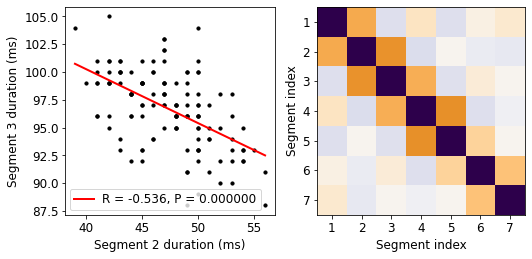

In [3]:
durs_all = loadmat('from_alison/V377_timecorrection.mat')['durations']
cc_log_power = loadmat('from_alison/V377_timecorrection.mat')['CC_durations']

show_idxs = (1, 2)
durs_x = durs_all[show_idxs[0]].astype(float).flatten()
durs_y = durs_all[show_idxs[1]].astype(float).flatten()

# durs_x = np.random.normal(0, .01, len(durs_x))
# durs_y = np.random.normal(0, .01, len(durs_y))

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.7), tight_layout=True)

slp, icpt, r, p_val, stderr = stats.linregress(durs_x, durs_y)
xs_line = np.array([durs_x.min(), durs_x.max()])
ys_line = slp*xs_line + icpt

axs[0].plot(xs_line, ys_line, c='r', lw=2)
axs[0].scatter(durs_all[show_idxs[0], :], durs_all[show_idxs[1], :], s=10, c='k')

axs[0].legend([f'R = {r:.3f}, P = {p_val:.6f}'], loc='lower left')
axs[0].set_xlabel(f'Segment {show_idxs[0]+1} duration (ms)')
axs[0].set_ylabel(f'Segment {show_idxs[1]+1} duration (ms)')

axs[1].matshow(cc_log_power, vmin=-1, vmax=1, cmap='PuOr')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(range(1, 8))
axs[1].xaxis.tick_bottom()
axs[1].set_yticks(range(7))
axs[1].set_yticklabels(range(1, 8))
axs[1].set_xlabel('Segment index')
axs[1].set_ylabel('Segment index')

set_font_size(axs, 12)

print('R =', r, 'P =', p_val)

fig.savefig('ms/4S1cd.svg')

# spectrogram (V443)

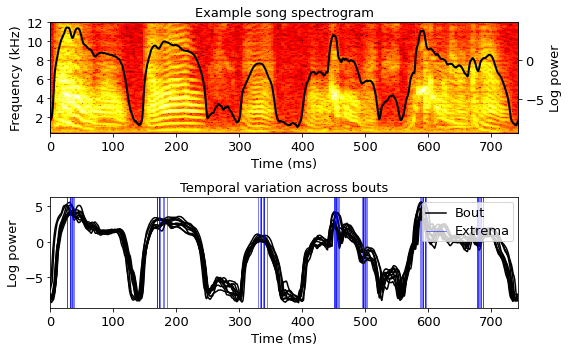

In [4]:
feat_rends = loadmat('from_alison/V443_timecorrection.mat')['savefeatslice'].T
extrema_all = loadmat('from_alison/V443_timecorrection.mat')['extrema_locations'].T
n_rends = 10

fig, axs = plt.subplots(2, 1, figsize=(8, 5), tight_layout=True)

for cr, (rend, extrema) in enumerate(zip(feat_rends[:n_rends], extrema_all[:n_rends])):
    axs[1].plot(rend, c='k')
    for extremum in extrema:
        axs[1].axvline(extremum, c='b', lw=.5)

axs[1].set_xlim(0, feat_rends.shape[1])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Log power')
axs[1].set_title('Temporal variation across bouts')
axs[1].legend(['Bout', 'Extrema'], loc='upper right')

t_start = 715
spec = loadmat('from_alison/V443_spectrogram_day130bout108.mat')['sonogram_im']
log_pwr = loadmat('from_alison/V443_spectrogram_day130bout108.mat')['logpower'].flatten()

axs[0].matshow(np.log(spec), origin='lower', cmap='hot', extent=[-t_start, len(log_pwr)-t_start, .3, 12])
axs[0].set_aspect('auto')
axs[0].xaxis.tick_bottom()
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Frequency (kHz)')
axs[0].set_title('Example song spectrogram')
ax_twin = axs[0].twinx()
ax_twin.plot(np.arange(len(log_pwr))-t_start, log_pwr, c='k', lw=2)
ax_twin.set_ylabel('Log power')

axs[0].set_xlim(0, feat_rends.shape[1])

set_font_size(cc([axs, [ax_twin]]), 13)

fig.savefig('ms/4S1ef.svg')

# segment duration correlations (V443)

In [5]:
temp = loadmat('from_alison/V443_timecorrection.mat')
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CC_durations', 'durations', 'extremaID', 'extrema_locations', 'featselect', 'feature_windows', 'savefeatslice', 'testday'])

R = -0.3262613921110814 P = 9.412542023991722e-05


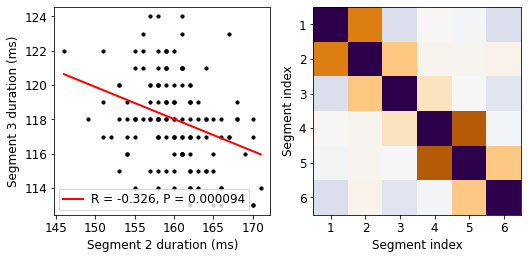

In [6]:
durs_all = loadmat('from_alison/V443_timecorrection.mat')['durations']
cc_log_power = loadmat('from_alison/V443_timecorrection.mat')['CC_durations']

show_idxs = (1, 2)
durs_x = durs_all[show_idxs[0]].astype(float).flatten()
durs_y = durs_all[show_idxs[1]].astype(float).flatten()

# durs_x = np.random.normal(0, .01, len(durs_x))
# durs_y = np.random.normal(0, .01, len(durs_y))

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.7), tight_layout=True)

slp, icpt, r, p_val, stderr = stats.linregress(durs_x, durs_y)
xs_line = np.array([durs_x.min(), durs_x.max()])
ys_line = slp*xs_line + icpt

axs[0].plot(xs_line, ys_line, c='r', lw=2)
axs[0].scatter(durs_all[show_idxs[0], :], durs_all[show_idxs[1], :], s=10, c='k')

axs[0].legend([f'R = {r:.3f}, P = {p_val:.6f}'], loc='lower left')
axs[0].set_xlabel(f'Segment {show_idxs[0]+1} duration (ms)')
axs[0].set_ylabel(f'Segment {show_idxs[1]+1} duration (ms)')

axs[1].matshow(cc_log_power, vmin=-1, vmax=1, cmap='PuOr')
axs[1].set_xticks(range(6))
axs[1].set_xticklabels(range(1, 7))
axs[1].xaxis.tick_bottom()
axs[1].set_yticks(range(6))
axs[1].set_yticklabels(range(1, 7))
axs[1].set_xlabel('Segment index')
axs[1].set_ylabel('Segment index')

set_font_size(axs, 12)

print('R =', r, 'P =', p_val)

fig.savefig('ms/4S1gh.svg')